In [1]:
# install YFinance
!pip install yfinance

In [38]:
# Import libraries
import pandas as pd
import numpy as np

import yfinance as yf
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

import requests
from bs4 import BeautifulSoup

import time
from datetime import date

## **Data Pulls**

In [3]:
end = date.today()
start = date(year=end.year-70, month=end.month, day=end.day) # Go back 70 yrs

print(f'Period for indexes: {start} to {end}')

Period for indexes: 1955-05-29 to 2025-05-29


### **GDP**

In [4]:
# Real Potential Gross Domestic Product (GDPPOT) in Billions, Quarterly data

gdppot = pdr.DataReader('GDPPOT', 'fred', start, end)
gdppot.tail(10)

,GDPPOT
DATE,
2023-01-01,22208.24254
2023-04-01,22333.11239
2023-07-01,22459.74068
2023-10-01,22588.18459
2024-01-01,22718.13000
2024-04-01,22849.87000
2024-07-01,22981.32000
2024-10-01,23113.34000
2025-01-01,23243.22000


In [5]:
# YoY Growth(in percentage): Compares each quarter's GDP to the same quarter one year earlier
gdppot['gdppot_us_yoy'] = round((gdppot['GDPPOT']/gdppot['GDPPOT'].shift(4) - 1) * 100, 4)

# QoQ Growth(in percentage): Compares each quarter’s GDP to the previous quarter.
gdppot['gdppot_us_qoq'] = round((gdppot['GDPPOT']/gdppot['GDPPOT'].shift(1) - 1) * 100, 4)

gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2024-04-01,22849.87,2.3139,0.5799
2024-07-01,22981.32,2.3223,0.5753
2024-10-01,23113.34,2.3249,0.5745
2025-01-01,23243.22,2.3113,0.5619
2025-04-01,23376.07,2.3029,0.5716


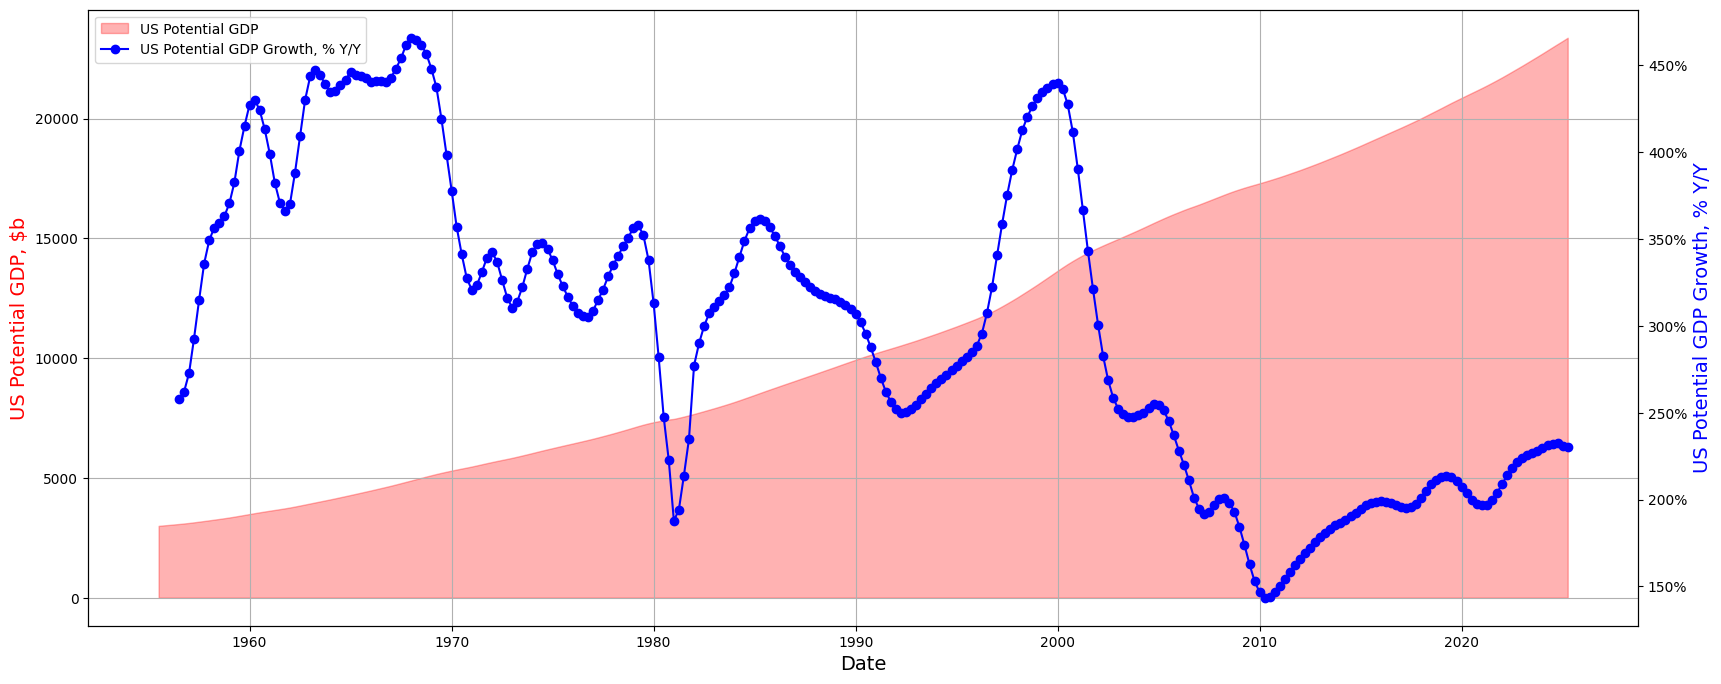

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### **Inflation - Core CPI**

In [7]:
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start) # "Core CPI index", MONTHLY

cpilfesl.head()

,CPILFESL
DATE,
1957-01-01,28.5
1957-02-01,28.6
1957-03-01,28.7
1957-04-01,28.8
1957-05-01,28.8


In [10]:
# Calculate YOY, MOM and QOQ in percentage
cpilfesl['cpi_yoy'] = round((cpilfesl['CPILFESL']/cpilfesl['CPILFESL'].shift(12) - 1) * 100, 4)
cpilfesl['cpi_qoq'] = round((cpilfesl['CPILFESL']/cpilfesl['CPILFESL'].shift(4) - 1) * 100, 4)
cpilfesl['cpi_mom'] = round((cpilfesl['CPILFESL']/cpilfesl['CPILFESL'].shift(1) - 1) * 100, 4)

cpilfesl.tail(13)

,CPILFESL,cpi_yoy,cpi_qoq,cpi_mom
DATE,,,,
2024-04-01,317.596,3.6236,1.3939,0.2633
2024-05-01,318.053,3.3905,1.1654,0.1439
2024-06-01,318.343,3.2606,0.8835,0.0912
2024-07-01,318.933,3.2283,0.6854,0.1853
2024-08-01,319.839,3.2918,0.7062,0.2841
2024-09-01,320.835,3.2899,0.8747,0.3114
2024-10-01,321.688,3.2928,1.0508,0.2659
2024-11-01,322.619,3.2801,1.1557,0.2894
2024-12-01,323.296,3.2136,1.0809,0.2098


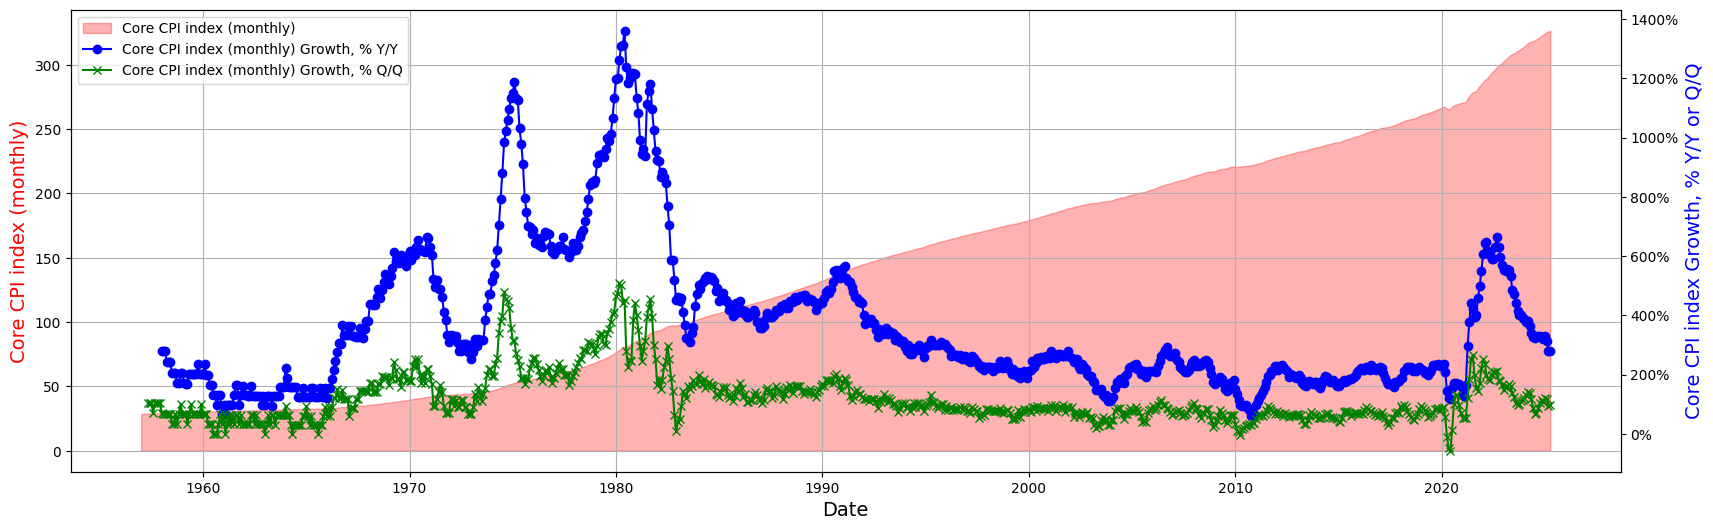

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")
ax2.plot(cpilfesl.cpi_qoq, color="green", marker="x", label="Core CPI index (monthly) Growth, % Q/Q")

# Labels, Titles and Legends
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y or Q/Q", color="blue", fontsize=14)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

### **SNP500**

Other indexes: https://stooq.com/t/

In [15]:
# SPX= S&P500 ~ daily data usually 252 trading days a year
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-05-28,5925.54,5939.92,5881.88,5888.55,2.671436e+09
2025-05-27,5854.07,5924.33,5854.07,5921.54,2.908887e+09
2025-05-23,5781.89,5829.51,5767.41,5802.82,2.552790e+09
2025-05-22,5841.26,5878.08,5825.82,5842.01,2.780477e+09
2025-05-21,5910.18,5938.37,5830.91,5844.61,3.120335e+09


In [16]:
# Get the reverse order of the data
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-05-28,5925.54,5939.92,5881.88,5888.55,2.671436e+09,-0.005571,-0.011335,0.117830
2025-05-27,5854.07,5924.33,5854.07,5921.54,2.908887e+09,0.020459,-0.005661,0.115796
2025-05-23,5781.89,5829.51,5767.41,5802.82,2.552790e+09,-0.006708,-0.030156,0.090467
2025-05-22,5841.26,5878.08,5825.82,5842.01,2.780477e+09,-0.000445,-0.028458,0.100578
2025-05-21,5910.18,5938.37,5830.91,5844.61,3.120335e+09,-0.016135,-0.044611,0.102077


In [17]:
# Use data from 1990

spx_truncated = spx_index[spx_index.index>='1990-01-01']

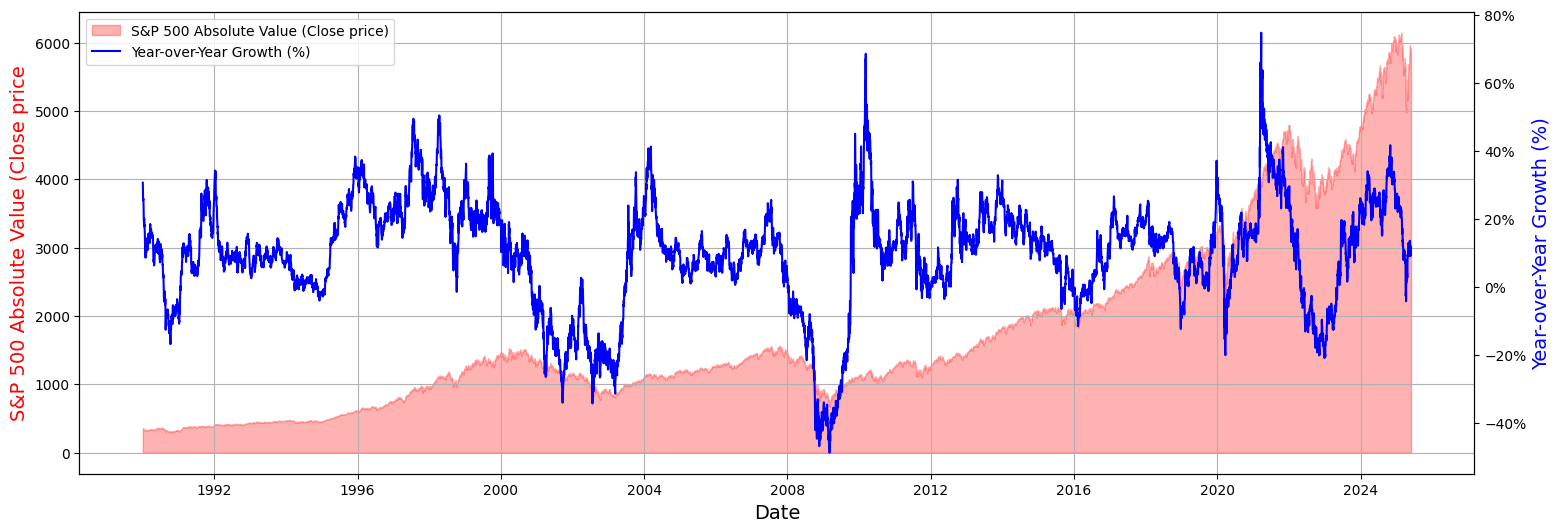

In [19]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(18, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## **Data Sources**

### Indices

In [20]:
# DAX index
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-23 00:00:00+02:00,24026.689453,24149.080078,23274.849609,23629.580078,94245400,0.0,0.0
2025-05-26 00:00:00+02:00,24009.099609,24050.599609,23932.039062,24027.650391,37001300,0.0,0.0
2025-05-27 00:00:00+02:00,24054.160156,24300.970703,24027.750000,24226.490234,53474100,0.0,0.0
2025-05-28 00:00:00+02:00,24250.990234,24325.970703,24038.189453,24038.189453,57894000,0.0,0.0
2025-05-29 00:00:00+02:00,24255.009766,24255.009766,23917.060547,23933.230469,0,0.0,0.0


In [23]:
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
2025-05-23 00:00:00+02:00,24026.689453,24149.080078,23274.849609,23629.580078,94245400,0.0,0.0,18693.369141,0.264062
2025-05-26 00:00:00+02:00,24009.099609,24050.599609,23932.039062,24027.650391,37001300,0.0,0.0,18774.710938,0.279788
2025-05-27 00:00:00+02:00,24054.160156,24300.970703,24027.750000,24226.490234,53474100,0.0,0.0,18677.869141,0.297069
2025-05-28 00:00:00+02:00,24250.990234,24325.970703,24038.189453,24038.189453,57894000,0.0,0.0,18473.289062,0.301240
2025-05-29 00:00:00+02:00,24255.009766,24255.009766,23917.060547,23933.230469,0,0.0,0.0,18496.789062,0.293913


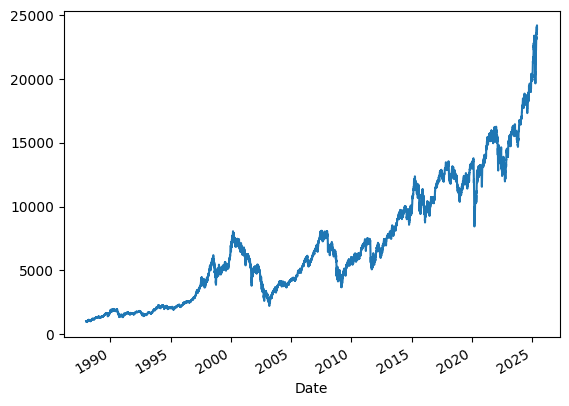

In [25]:
dax_daily['Close'].plot.line();

In [27]:
# S&P 500
ticker_obj = yf.Ticker("^SPX")
snp500_daily = ticker_obj.history(start = start)

snp500_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-22 00:00:00-04:00,5841.259766,5878.080078,5825.819824,5842.009766,5157050000,0.0,0.0
2025-05-23 00:00:00-04:00,5781.890137,5829.509766,5767.410156,5802.819824,4662820000,0.0,0.0
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5887.419922,1181866569,0.0,0.0


In [29]:
# Dow Jones Industrial Average

ticker_obj = yf.Ticker("^DJI")
dji_daily = ticker_obj.history(start = start, interval = "1d")

dji_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-21 00:00:00-04:00,42354.460938,42439.269531,41785.218750,41860.441406,607900000,0.0,0.0
2025-05-22 00:00:00-04:00,41763.679688,42090.421875,41714.429688,41859.089844,476080000,0.0,0.0
2025-05-23 00:00:00-04:00,41525.699219,41788.609375,41354.089844,41603.070312,497060000,0.0,0.0
2025-05-27 00:00:00-04:00,41849.039062,42350.660156,41849.039062,42343.648438,501340000,0.0,0.0
2025-05-28 00:00:00-04:00,42361.628906,42448.718750,42042.261719,42098.699219,518840000,0.0,0.0


### ETFs - Exchange Traded Funds

In [30]:
# ETFs
ticker_obj = yf.Ticker("VOO")
voo_etf = ticker_obj.history(start = start, interval = "1d")

voo_etf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-05-22 00:00:00-04:00,535.599976,539.229980,534.440002,536.020020,5816600,0.0,0.0,0.0
2025-05-23 00:00:00-04:00,529.429993,534.809998,529.109985,532.400024,6455900,0.0,0.0,0.0
2025-05-27 00:00:00-04:00,538.719971,543.520020,537.179993,543.340027,6118100,0.0,0.0,0.0
2025-05-28 00:00:00-04:00,543.789978,544.900024,539.609985,540.239990,4844700,0.0,0.0,0.0
2025-05-29 00:00:00-04:00,545.150024,545.280029,538.780029,541.489990,2945566,0.0,0.0,0.0


In [32]:
# get_dividends() outputs dividends only
voo = yf.Ticker("VOO")
voo.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2010-09-24 00:00:00-04:00,0.558,0.0,0.0
2010-12-27 00:00:00-05:00,0.526,0.0,0.0
2011-03-25 00:00:00-04:00,0.536,0.0,0.0
2011-06-24 00:00:00-04:00,0.570,0.0,0.0
2011-09-23 00:00:00-04:00,0.580,0.0,0.0
2011-12-23 00:00:00-05:00,0.686,0.0,0.0
2012-03-26 00:00:00-04:00,0.570,0.0,0.0
2012-06-25 00:00:00-04:00,0.640,0.0,0.0
2012-09-24 00:00:00-04:00,0.686,0.0,0.0


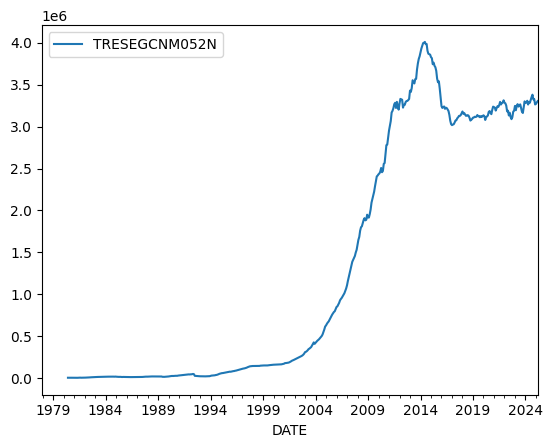

In [35]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

gold_reserves.plot.line();

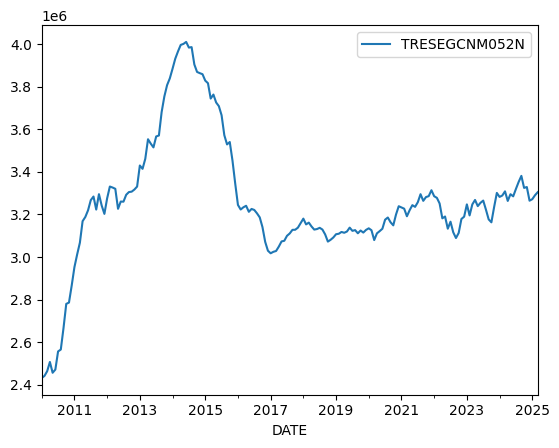

In [37]:
gold_reserves_trunc = gold_reserves[gold_reserves.index >= '2010-01-01']
gold_reserves_trunc.plot.line();

## **Web Scraping**

In [39]:
url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [40]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    99.29     99.88   165.00     70.70   
1               Stock Market  5905.00   5889.00  6153.00      4.40   
2            GDP Growth Rate    -0.20      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.10      2.50    13.40     -7.50   
4          Unemployment Rate     4.20      4.20    14.90      2.50   
5          Non Farm Payrolls   177.00    185.00  4631.00 -20471.00   
6             Inflation Rate     2.30      2.40    23.70    -15.80   
7         Inflation Rate MoM     0.20     -0.10     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade  -140.00   -123.00     1.95   -140.00   
10           Current Account  -304.00   -310.00     9.96   -310.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

<ipython-input-40-7e84ec23ab8e>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [44]:
# URL of the webpage
url = "https://companiesmarketcap.com/"

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")


CSV file downloaded successfully.


In [45]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

global_stocks['marketcap_b_usd'] = global_stocks.marketcap/1e9

global_stocks.head(10)

,Rank,Name,Symbol,marketcap,price (USD),country,marketcap_b_usd
0,1,NVIDIA,NVDA,3421580296192,140.30000,United States,3421.580296
1,2,Microsoft,MSFT,3411238453248,458.96000,United States,3411.238453
2,3,Apple,AAPL,2985358524416,199.87900,United States,2985.358524
3,4,Amazon,AMZN,2189207928832,206.21000,United States,2189.207929
4,5,Alphabet (Google),GOOG,2085264162816,172.40000,United States,2085.264163
5,6,Meta Platforms (Facebook),META,1620007976960,644.31000,United States,1620.007977
6,7,Saudi Aramco,2222.SR,1611807894053,6.66436,Saudi Arabia,1611.807894
7,8,Tesla,TSLA,1167291973632,362.40500,United States,1167.291974
8,9,Broadcom,AVGO,1137354735616,241.89000,United States,1137.354736
9,10,Berkshire Hathaway,BRK-B,1084462596096,502.64800,United States,1084.462596


In [46]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             10000 non-null  int64  
 1   Name             10000 non-null  object 
 2   Symbol           9999 non-null   object 
 3   marketcap        10000 non-null  int64  
 4   price (USD)      10000 non-null  float64
 5   country          10000 non-null  object 
 6   marketcap_b_usd  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


## **Financials**

In [41]:
nvda =  yf.Ticker('NVDA')

# yearly financials for the last 4 years
nvda.financials

,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.0,0.0,-284130000.0,0.0
Tax Rate For Calcs,0.133,0.12,0.21,0.019
Normalized EBITDA,86137000000.0,35583000000.0,7339000000.0,11351000000.0
Total Unusual Items,0.0,0.0,-1353000000.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,-1353000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,72880000000.0,29760000000.0,4368000000.0,9752000000.0
Reconciled Depreciation,1864000000.0,1508000000.0,1543000000.0,1174000000.0
Reconciled Cost Of Revenue,32639000000.0,16621000000.0,11618000000.0,9439000000.0
EBITDA,86137000000.0,35583000000.0,5986000000.0,11351000000.0
EBIT,84273000000.0,34075000000.0,4443000000.0,10177000000.0


In [42]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [43]:
# Basic info:
nvda.basic_info

/usr/local/lib/python3.11/dist-packages/yfinance/base.py:307: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']